In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

# design matrix
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
beta = np.linalg.lstsq(X,happiness,rcond=None)[0]

In [7]:
gridResolution = 20

In [8]:
intercepts = np.linspace(0,80,gridResolution)
slopes = np.linspace(0,6,gridResolution)

In [9]:
r2 = np.zeros((len(intercepts),len(slopes)))
allYhat = np.zeros((len(intercepts),len(slopes),len(happiness)))

In [10]:
for inti in range(len(intercepts)):
  for slopei in range(len(slopes)):

    # model-predicted data
    yHat = X @ np.array([intercepts[inti],slopes[slopei]]).T

    # R2 model fit
    r2[inti,slopei] = np.corrcoef(yHat,happiness)[0,1]**2
    
    # store all predicted data values
    allYhat[inti,slopei,:] = yHat

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [11]:
i,j = np.unravel_index( np.argmax(r2),r2.shape )
empIntercept,empSlope = intercepts[i], slopes[j]

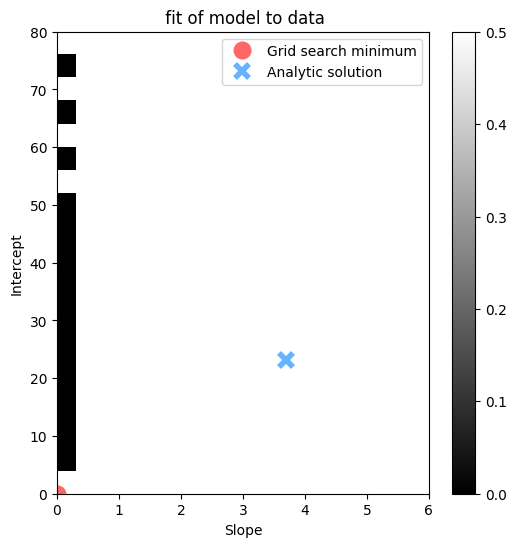

In [12]:
plt.figure(figsize=(6,6))
plt.imshow(r2,vmin=0,vmax=.5,
           extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]],
           origin='lower',aspect='auto',cmap='gray')
plt.plot(empSlope,empIntercept,'o',color=[1,.4,.4],markersize=12,label='Grid search minimum')
plt.plot(beta[1],beta[0],'x',color=[.4,.7,1],markeredgewidth=4,markersize=10,label='Analytic solution')
plt.colorbar()
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title(' fit of model to data')
plt.legend()
plt.show()

In [13]:
print('Analytic result: ')
print(f'   Intercept: {beta[0]:.2f}, slope: {beta[1]:.2f}')
print(' ')
print('Empirical result: ')
print(f'   Intercept: {empIntercept:.2f}, slope: {empSlope:.2f}')
     

Analytic result: 
   Intercept: 23.13, slope: 3.70
 
Empirical result: 
   Intercept: 0.00, slope: 0.00


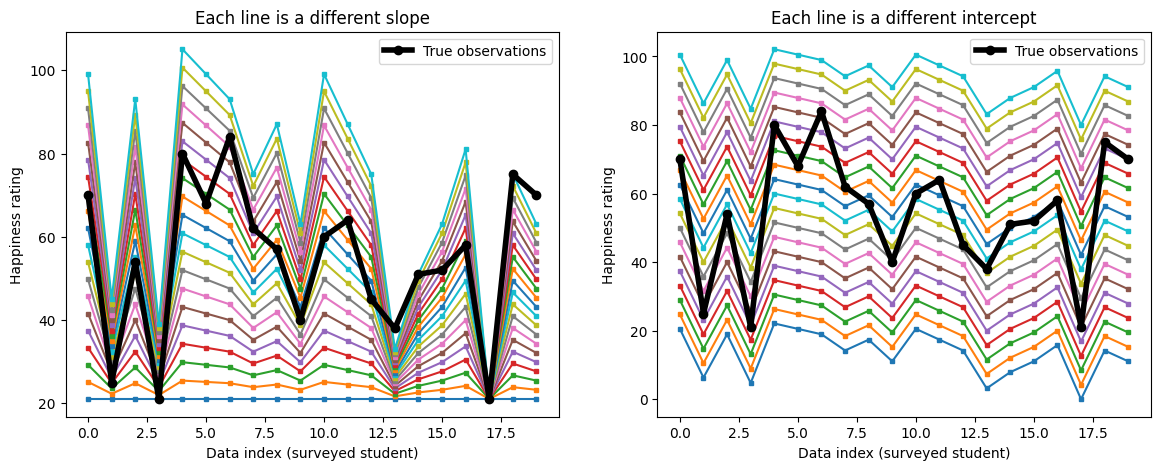

In [14]:
_,axs = plt.subplots(1,2,figsize=(14,5))

axs[0].plot(allYhat[5,:,:].T,'s-',markersize=3)
axs[0].plot(happiness,'ko-',linewidth=4,label='True observations')
axs[0].set_xlabel('Data index (surveyed student)')
axs[0].set_ylabel('Happiness rating')
axs[0].set_title('Each line is a different slope')
axs[0].legend()

axs[1].plot(allYhat[:,5,:].T,'s-',markersize=3)
axs[1].plot(happiness,'ko-',linewidth=4,label='True observations')
axs[1].set_xlabel('Data index (surveyed student)')
axs[1].set_ylabel('Happiness rating')
axs[1].set_title('Each line is a different intercept')
axs[1].legend()

plt.show()

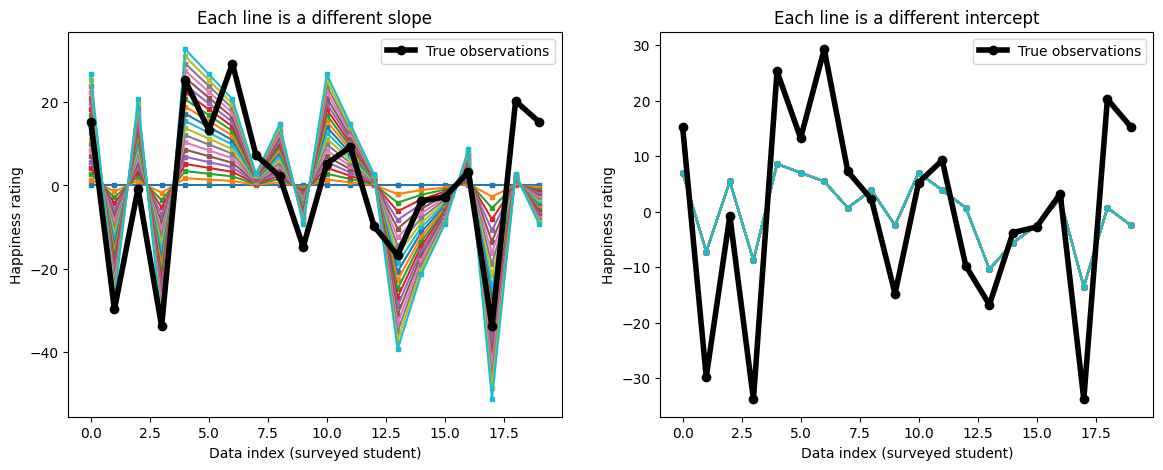

In [15]:
_,axs = plt.subplots(1,2,figsize=(14,5))

axs[0].plot(allYhat[5,:,:].T - np.mean(allYhat[5,:,:].T,axis=0),'s-',markersize=3)
axs[0].plot(happiness-np.mean(happiness),'ko-',linewidth=4,label='True observations')
axs[0].set_xlabel('Data index (surveyed student)')
axs[0].set_ylabel('Happiness rating')
axs[0].set_title('Each line is a different slope')
axs[0].legend()

axs[1].plot(allYhat[:,5,:].T - np.mean(allYhat[:,5,:].T,axis=0),'s-',markersize=3)
axs[1].plot(happiness-np.mean(happiness),'ko-',linewidth=4,label='True observations')
axs[1].set_xlabel('Data index (surveyed student)')
axs[1].set_ylabel('Happiness rating')
axs[1].set_title('Each line is a different intercept')
axs[1].legend()

plt.show()